In [48]:
# Importing all the necessary libraries 

import os
import pandas as pd
import numpy as np
import datetime 
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [49]:
# Reading the dataset

base_data = pd.read_csv('20222703 Causes Of Death Clean Output V2.0.csv')

In [50]:
# Filter out USA Data

us_data = base_data[base_data['Entity'] == 'United States']

In [51]:
# Prints the dataset

us_data

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
191565,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,1249.0,United States,USA,2007
191566,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,625940.0,United States,USA,2007
191567,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",4301.0,United States,USA,2007
191568,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,0.0,United States,USA,2007
191569,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,3864.0,United States,USA,2007
...,...,...,...,...,...,...
192550,Digestive diseases,Deaths - Digestive diseases - Sex: Both - Age:...,129343.0,United States,USA,2019
192551,Acute hepatitis,Deaths - Acute hepatitis - Sex: Both - Age: Al...,131.0,United States,USA,2019
192552,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,143919.0,United States,USA,2019
192553,Parkinson's disease,Deaths - Parkinson's disease - Sex: Both - Age...,32211.0,United States,USA,2019


In [52]:
# Drops any non numbers

us_data = us_data.dropna()

In [12]:
# Tells you how many rows and columns you have after the drops
us_data.shape

(967, 6)

In [53]:
# Gives you information about the United States dataframe
us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 191565 to 192553
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Causes name              967 non-null    object 
 1   Causes Full Description  967 non-null    object 
 2   Death Numbers            967 non-null    float64
 3   Entity                   967 non-null    object 
 4   Code                     967 non-null    object 
 5   Year                     967 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 52.9+ KB


In [60]:
# Prints the number of deaths that occurred each year in the United States

print(us_data[['Death Numbers', 'Year']].to_string(index=False))

# The Year Column is actually not grouped correctly via Year so this will group it ascending 
us_data = us_data.sort_values('Year')

# By using this, we can find trends and ask questions such as, "Has the death numbers gone up since 1990?" etc..



 Death Numbers  Year
        2419.0  1990
      879646.0  1990
        2795.0  1990
          21.0  1990
       47140.0  1990
        1330.0  1990
           5.0  1990
       12895.0  1990
       33101.0  1990
       37386.0  1990
       78301.0  1990
         202.0  1990
       73079.0  1990
         681.0  1990
        1468.0  1990
         230.0  1990
      106098.0  1990
        6763.0  1990
       33964.0  1990
       19306.0  1990
       72716.0  1990
         538.0  1990
       48970.0  1990
        2271.0  1990
       25341.0  1990
        5865.0  1990
        4370.0  1990
           0.0  1990
        5336.0  1990
      539139.0  1990
        1830.0  1990
       27789.0  1990
           2.0  1991
         159.0  1991
       49037.0  1991
        1282.0  1991
        2481.0  1991
      877798.0  1991
       34014.0  1991
       13217.0  1991
        2855.0  1991
        1406.0  1991
       78694.0  1991
       37417.0  1991
         210.0  1991
      109587.0  1991
       33885.

In [62]:
# Prints out the Column names
us_data.columns

Index(['Causes name', 'Causes Full Description', 'Death Numbers', 'Entity',
       'Code', 'Year'],
      dtype='object')

In [67]:
# Changing some of the Columns names
us_data = us_data.rename(columns = {'Causes name': 'Cause of Death','Death Numbers': 'Total Deaths', 'Entity': 'Country'})

In [69]:
# Prints out the updated Column names

us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 191917 to 192553
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cause of Death           967 non-null    object 
 1   Causes Full Description  967 non-null    object 
 2   Total Deaths             967 non-null    float64
 3   Country                  967 non-null    object 
 4   Code                     967 non-null    object 
 5   Year                     967 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 52.9+ KB


In [70]:
# Prints out the new table in ascending order

us_data

,Cause of Death,Causes Full Description,Total Deaths,Country,Code,Year
191917,Protein-energy malnutrition,Deaths - Protein-energy malnutrition - Sex: Bo...,2419.0,United States,USA,1990
191901,HIV/AIDS,Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...,27789.0,United States,USA,1990
191895,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,1830.0,United States,USA,1990
191896,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,539139.0,United States,USA,1990
191897,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",5336.0,United States,USA,1990
...,...,...,...,...,...,...
192550,Digestive diseases,Deaths - Digestive diseases - Sex: Both - Age:...,129343.0,United States,USA,2019
192538,Environmental heat and cold exposure,Deaths - Environmental heat and cold exposure ...,1378.0,United States,USA,2019
192547,Chronic kidney disease,Deaths - Chronic kidney disease - Sex: Both - ...,106954.0,United States,USA,2019
192525,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,0.0,United States,USA,2019


In [73]:
# Describes the table (median, mean, max, etc.)

us_data.describe()

,Total Deaths,Year
count,967.000000,967.000000
mean,73631.565667,2004.555326
std,183102.458059,8.631206
min,0.000000,1990.000000
25%,1250.500000,1997.000000
50%,10895.000000,2005.000000
75%,53069.000000,2012.000000
max,957455.000000,2019.000000


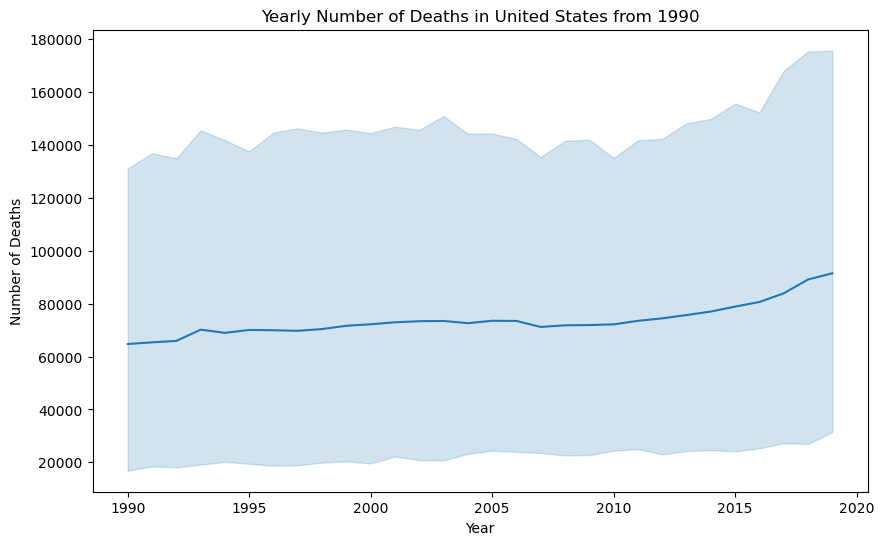

In [80]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))
plt.title("Yearly Number of Deaths in United States from 1990")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
sns.lineplot(x=us_data['Year'], y=us_data['Total Deaths'])
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.show()

In [85]:
# Shows us how many people died (in percent) for each year

year_counts=us_data.groupby('Year')['Total Deaths'].sum()
percentages=100*year_counts/year_counts.sum()
print(percentages)

# Inferences show us that as the years went up, so did deaths

Year
1990    2.908630
1991    2.936898
1992    2.961770
1993    3.053503
1994    3.098155
1995    3.147643
1996    3.142708
1997    3.132948
1998    3.163318
1999    3.218171
2000    3.244128
2001    3.277796
2002    3.296100
2003    3.300176
2004    3.262259
2005    3.303648
2006    3.300433
2007    3.298363
2008    3.327417
2009    3.331667
2010    3.343982
2011    3.405345
2012    3.448968
2013    3.506890
2014    3.568359
2015    3.654837
2016    3.735748
2017    3.769454
2018    3.879094
2019    3.981595
Name: Total Deaths, dtype: float64


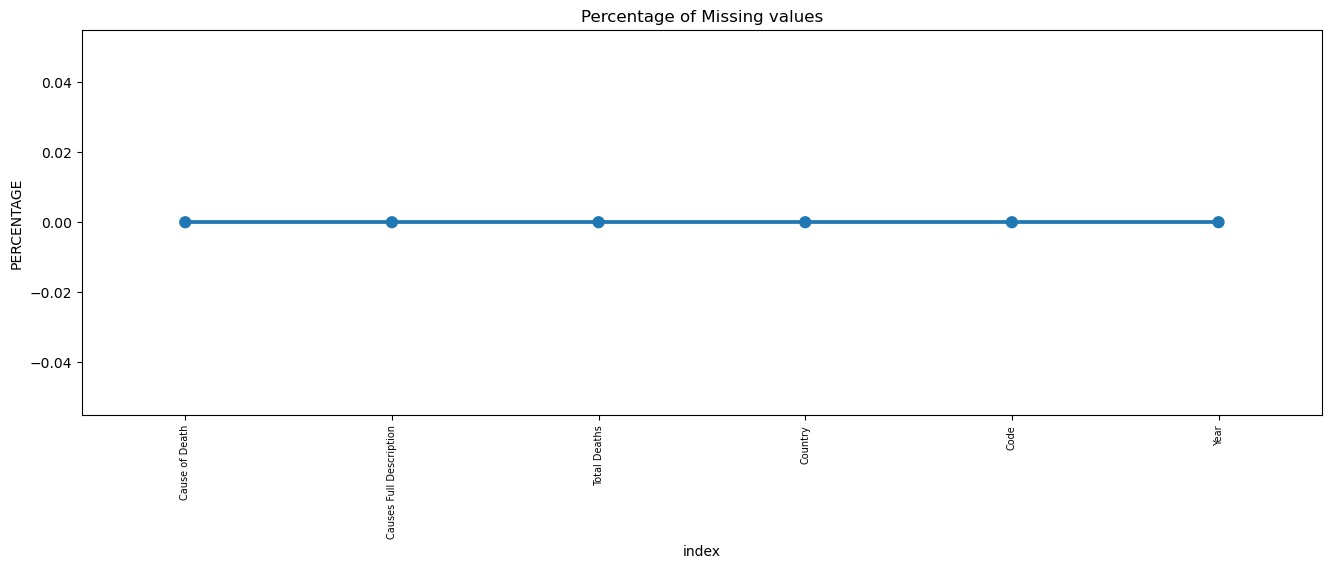

In [91]:
# Checking to see if there is any missing values in the data or not 

missing = pd.DataFrame((us_data.isnull().sum())*100/us_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


# Missing data - Initial Intuition
#### We don't have any missing data

In [92]:
new_us_data = us_data.copy()

In [93]:
new_us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 191917 to 192553
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cause of Death           967 non-null    object 
 1   Causes Full Description  967 non-null    object 
 2   Total Deaths             967 non-null    float64
 3   Country                  967 non-null    object 
 4   Code                     967 non-null    object 
 5   Year                     967 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 52.9+ KB


In [95]:
# This prints out the highest number of deaths in the dataset
print(us_data['Total Deaths'].max()) 

957455.0


# Checking for Null Values

In [96]:
# Checks for null values
null_counts = us_data.isnull().sum()
print(null_counts)

Cause of Death             0
Causes Full Description    0
Total Deaths               0
Country                    0
Code                       0
Year                       0
dtype: int64


#### We do not have any Null values, therefore no data cleaning is required

# Exploring What Most Americans Pass Away Of

In [39]:
us_data.head()

,Cause of Death,Causes Full Description,Total Deaths,Country,Code,Year
191917,Protein-energy malnutrition,Deaths - Protein-energy malnutrition - Sex: Bo...,2419.0,United States,USA,1990-01-01
191926,Parkinson's disease,Deaths - Parkinson's disease - Sex: Both - Age...,12895.0,United States,USA,1990-01-01
191925,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,73079.0,United States,USA,1990-01-01
191924,Acute hepatitis,Deaths - Acute hepatitis - Sex: Both - Age: Al...,202.0,United States,USA,1990-01-01
191923,Digestive diseases,Deaths - Digestive diseases - Sex: Both - Age:...,78301.0,United States,USA,1990-01-01


In [ ]:
# Taking out only the diseases from 'Causes name' and printing all of them out one by one

causes_of_death = us_data['Causes name'].unique()
print(causes_of_death)

Causes Full Description
Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)                                                            [Acute hepatitis]
Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)                                                [Alcohol use disorders]
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)            [Alzheimer's disease and other dementias]
Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)                                            [Cardiovascular diseases]
Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)                                              [Chronic kidney disease]
Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)                                  [Chronic respiratory diseases]
Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)      [Cirrhosis and other chronic liver diseases]
Dea

In [ ]:
causes_of_death.dropna(inplace=True)
causes_of_death.tail()

Causes Full Description
Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)    [Protein-energy malnutrition]
Deaths - Road injuries - Sex: Both - Age: All Ages (Number)                                [Road injuries]
Deaths - Self-harm - Sex: Both - Age: All Ages (Number)                                        [Self-harm]
Deaths - Terrorism (deaths) ---                                                       [Terrorism (deaths)]
Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)                                  [Tuberculosis]
Name: Causes name, dtype: object

In [45]:
# Importing all the necessary libraries 

import os
import pandas as pd
import numpy as np
import datetime 
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Reading the dataset

base_data = pd.read_csv('20222703 Causes Of Death Clean Output V2.0.csv')

# Filter out USA Data

us_data = base_data[base_data['Entity'] == 'United States']

# Prints the dataset

us_data

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
191565,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,1249.0,United States,USA,2007
191566,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,625940.0,United States,USA,2007
191567,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",4301.0,United States,USA,2007
191568,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,0.0,United States,USA,2007
191569,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,3864.0,United States,USA,2007
...,...,...,...,...,...,...
192550,Digestive diseases,Deaths - Digestive diseases - Sex: Both - Age:...,129343.0,United States,USA,2019
192551,Acute hepatitis,Deaths - Acute hepatitis - Sex: Both - Age: Al...,131.0,United States,USA,2019
192552,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,143919.0,United States,USA,2019
192553,Parkinson's disease,Deaths - Parkinson's disease - Sex: Both - Age...,32211.0,United States,USA,2019


In [46]:
us_data.head()

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
191565,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,1249.0,United States,USA,2007
191566,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,625940.0,United States,USA,2007
191567,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",4301.0,United States,USA,2007
191568,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,0.0,United States,USA,2007
191569,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,3864.0,United States,USA,2007


In [47]:
# Drops any non numbers

us_data = us_data.dropna()

In [48]:
# Tells you how many rows and columns you have after the drops
us_data.shape

(967, 6)

In [49]:
us_data.head()


,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
191565,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,1249.0,United States,USA,2007
191566,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,625940.0,United States,USA,2007
191567,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",4301.0,United States,USA,2007
191568,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,0.0,United States,USA,2007
191569,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,3864.0,United States,USA,2007


In [50]:
# Gives you information about the United States dataframe
us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 191565 to 192553
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Causes name              967 non-null    object 
 1   Causes Full Description  967 non-null    object 
 2   Death Numbers            967 non-null    float64
 3   Entity                   967 non-null    object 
 4   Code                     967 non-null    object 
 5   Year                     967 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 52.9+ KB


In [51]:
# Prints the number of deaths that occurred each year in the United States
print(us_data[['Death Numbers', 'Year']].to_string(index=False))

# The Year Column is actually not grouped correctly via Year so this will group it ascending 
us_data = us_data.sort_values('Year')

 Death Numbers  Year
        1249.0  2007
      625940.0  2007
        4301.0  2007
           0.0  2007
        3864.0  2007
       19370.0  2007
       12444.0  2007
       28251.0  2007
         953.0  2007
       46498.0  2007
        1062.0  2007
       69811.0  2007
       15210.0  2007
       10895.0  2007
         240.0  2007
        9586.0  2007
        1201.0  2007
        4238.0  2007
       39352.0  2007
        1031.0  2007
       73228.0  2007
        1414.0  2007
        3861.0  2007
           0.0  2007
      836120.0  2007
       72852.0  2007
      172341.0  2007
       51575.0  2007
      103120.0  2007
         152.0  2007
      114585.0  2007
       23705.0  2007
          42.0  2007
        1223.0  2008
      637146.0  2008
        3927.0  2008
           0.0  2008
        3819.0  2008
       18716.0  2008
       11400.0  2008
       29263.0  2008
         926.0  2008
       44535.0  2008
        1103.0  2008
       69921.0  2008
       14606.0  2008
       11191.

In [52]:
# Changing some of the Columns names

us_data = us_data.rename(columns = {'Causes name': 'Cause of Death','Death Numbers': 'Total Deaths', 'Entity': 'Country'})

In [53]:
# Prints out the updated Column names

us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 191917 to 192553
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cause of Death           967 non-null    object 
 1   Causes Full Description  967 non-null    object 
 2   Total Deaths             967 non-null    float64
 3   Country                  967 non-null    object 
 4   Code                     967 non-null    object 
 5   Year                     967 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 52.9+ KB


In [54]:
us_data

,Cause of Death,Causes Full Description,Total Deaths,Country,Code,Year
191917,Protein-energy malnutrition,Deaths - Protein-energy malnutrition - Sex: Bo...,2419.0,United States,USA,1990
191926,Parkinson's disease,Deaths - Parkinson's disease - Sex: Both - Age...,12895.0,United States,USA,1990
191925,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,73079.0,United States,USA,1990
191924,Acute hepatitis,Deaths - Acute hepatitis - Sex: Both - Age: Al...,202.0,United States,USA,1990
191923,Digestive diseases,Deaths - Digestive diseases - Sex: Both - Age:...,78301.0,United States,USA,1990
...,...,...,...,...,...,...
192523,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,773895.0,United States,USA,2019
192522,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,1146.0,United States,USA,2019
192552,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,143919.0,United States,USA,2019
192536,Exposure to forces of nature,Deaths - Exposure to forces of nature - Sex: B...,105.0,United States,USA,2019


In [55]:
# Groups each year to a certain disease and then prints out the amount of deaths correlated to that year and disease

grouped_data = us_data.groupby(['Cause of Death', 'Year'])['Total Deaths'].sum()
print(grouped_data)


Cause of Death   Year
Acute hepatitis  1990    202.0
                 1991    210.0
                 1992    221.0
                 1993    232.0
                 1994    243.0
                         ...  
Tuberculosis     2015    900.0
                 2016    927.0
                 2017    929.0
                 2018    956.0
                 2019    978.0
Name: Total Deaths, Length: 967, dtype: float64


In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Group up the data in us_data DataFrame into two columns, year and cause of death. 
# Then use sum() to sum up the Total Deaths

grouped_data = us_data.groupby(['Year', 'Cause of Death'])['Total Deaths'].sum().reset_index()


In [58]:
# Filter the latest year in the dataset
latest_year = grouped_data['Year'].max()
grouped_data = grouped_data[grouped_data['Year'] == latest_year]

# Sort the data in descending order
grouped_data = grouped_data.sort_values(by='Total Deaths', ascending=False)

In [59]:
# Lets convert the 'Year' Column to a 'datetime' format so that we can extract the years we want out
us_data['Year'] = pd.to_datetime(us_data['Year'], format='%Y')

In [60]:
start_date = pd.to_datetime('1990', format='%Y')
end_date = pd.to_datetime('2000', format='%Y')
filtered_data = us_data[(us_data['Year'] >= start_date) & (us_data['Year'] <= end_date)]

# print out the filtered data
print(filtered_data)

                                 Cause of Death   
191917              Protein-energy malnutrition  \
191926                      Parkinson's disease   
191925  Alzheimer's disease and other dementias   
191924                          Acute hepatitis   
191923                       Digestive diseases   
...                                         ...   
192237                       Neonatal disorders   
192238                    Alcohol use disorders   
192239             Exposure to forces of nature   
192240                       Diarrheal diseases   
192234                            Road injuries   

                                  Causes Full Description  Total Deaths   
191917  Deaths - Protein-energy malnutrition - Sex: Bo...        2419.0  \
191926  Deaths - Parkinson's disease - Sex: Both - Age...       12895.0   
191925  Deaths - Alzheimer's disease and other dementi...       73079.0   
191924  Deaths - Acute hepatitis - Sex: Both - Age: Al...         202.0   
191923  Deat

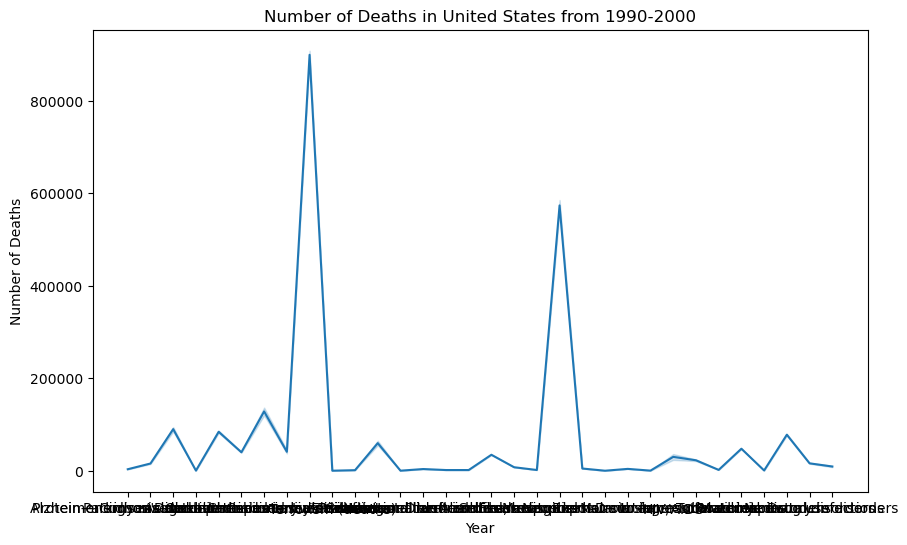

In [63]:
# Plotting the 1990-2000 Total Death by Disease 

plt.figure(figsize=(10,6))
plt.title("Number of Deaths in United States from 1990-2000")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
sns.lineplot(x=filtered_data['Cause of Death'], y = filtered_data['Total Deaths'])
plt.show()

# this is wrong --> update